In [1]:
import numpy as np
import matplotlib.pyplot as plt

A = 1 
x_min, x_max = -0.5, 0.5 
L = x_max - x_min
Mx = 100 
dx = L / Mx
CFL = 0.5 
dt = CFL * dx / A
T = 0.1
Mt = int(T / dt)

x = np.linspace(x_min, x_max, Mx, endpoint=False)

U = np.zeros(x.shape)

def Initial_Condition(x):
    if -0.5 <= x and x < -0.25:
        return 0
    elif x >= -0.25 and x <= 0.25:
        return 1
    elif x > 0.25 and x <= 0.5:
        return 0
    else:
        print(x)
        raise ValueError("The spatial coordinate is out of the computatioanl domain.")
        

def Explicit(U,T,p2=0,p1=0,n0=0,m1=0,m2=0):
    Um = U.copy()
    for j in range(Mx):
        U[j] = Initial_Condition(x_min + j * dx)
    for n in range(int(T/dt)):
        Um = U.copy()
        for j in range(Mx):
            U[j] = p2 * Um[(j+2)%Mx] + p1 * Um[(j+1)%Mx] + n0 * Um[j] + m1 * Um[(j-1)%Mx] + m2 * Um[(j-2)%Mx]
    return U 
    




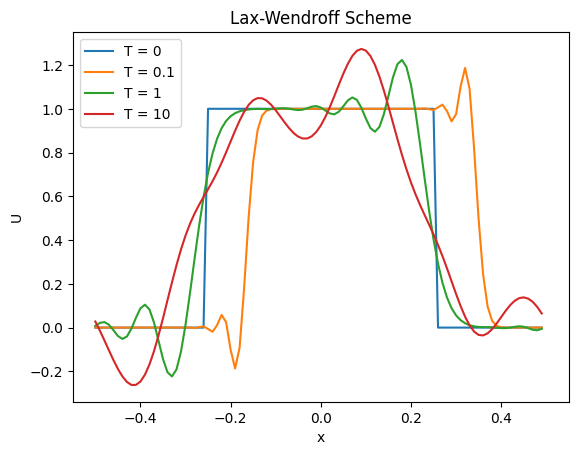

In [5]:
# Lax-Wendroff
c = CFL

p1 = 0.5 * c**2 - 0.5 * c
n0 = 1 - c**2
m1 = 0.5 * c**2 + 0.5 * c
m2 = 0

U0 = U.copy()
for j in range(Mx):
    U0[j] = Initial_Condition(x_min + j * dx)



fig, ax = plt.subplots() 

ax.plot(x, U0, label='T = 0')
U1 = Explicit(U, 0.1, p1=p1,n0=n0, m1=m1)
ax.plot(x, U1, label='T = 0.1')
U2 = Explicit(U, 1.0, p1=p1,n0=n0, m1=m1)
ax.plot(x, U2, label='T = 1') 
U3 = Explicit(U, 10, p1=p1,n0=n0, m1=m1)
ax.plot(x, U3, label='T = 10') 
ax.set_xlabel('x') 
ax.set_xlim(-0.55,0.55)
# ax.set_ylim(0,1.25)
ax.set_ylabel('U') 
ax.set_title('Lax-Wendroff Scheme') 
ax.legend() 

plt.show() 

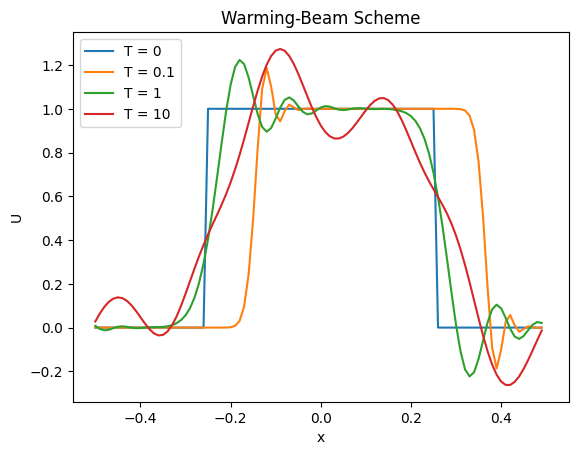

In [6]:
# Warming-Beam
c = CFL

p1 =0
n0 = 1 - 1.5 * c + 0.5 * c**2
m1 = 2*c - c**2
m2 = 0.5 * c**2 - 0.5 *c

U0 = U.copy()
for j in range(Mx):
    U0[j] = Initial_Condition(x_min + j * dx)



fig, ax = plt.subplots() 

ax.plot(x, U0, label='T = 0')
U1 = Explicit(U, 0.1, n0=n0, m1=m1,m2=m2)
ax.plot(x, U1, label='T = 0.1')
U2 = Explicit(U, 1.0, n0=n0, m1=m1,m2=m2)
ax.plot(x, U2, label='T = 1') 
U3 = Explicit(U, 10, n0=n0, m1=m1,m2=m2)
ax.plot(x, U3, label='T = 10') 
ax.set_xlabel('x') 
ax.set_xlim(-0.55,0.55)
# ax.set_ylim(0,1.25)
ax.set_ylabel('U') 
ax.set_title('Warming-Beam Scheme') 
ax.legend() 

plt.show() 

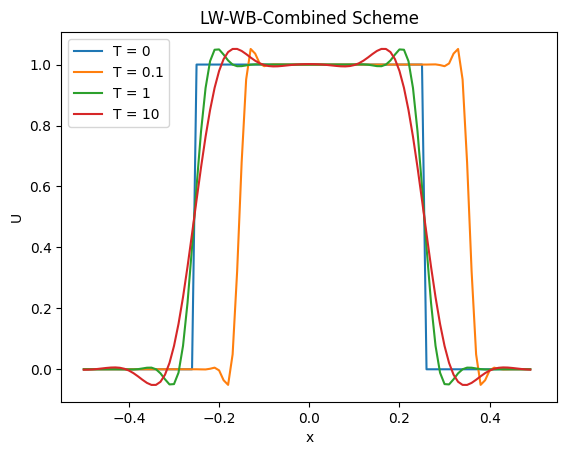

In [9]:
# New scheme as a combination of LW and WB
c = CFL

# Parameters of LW
p1 = 0.5 * c**2 - 0.5 * c
n0 = 1 - c**2
m1 = 0.5 * c**2 + 0.5 * c
m2 = 0

A = [p1, n0, m1, m2]

# Parameters of WB
p1 =0
n0 = 1 - 1.5 * c + 0.5 * c**2
m1 = 2*c - c**2
m2 = 0.5 * c**2 - 0.5 *c

B = [p1, n0, m1, m2]

C = [0,0,0,0]

for i in range(len(C)):
    C[i] = (2-c)/3 *A[i] + ((1+c)/3)*B[i]

U0 = U.copy()
for j in range(Mx):
    U0[j] = Initial_Condition(x_min + j * dx)

fig, ax = plt.subplots() 

ax.plot(x, U0, label='T = 0')
U1 = Explicit(U, 0.1, p1=C[0],n0=C[1], m1=C[2],m2=C[3])
ax.plot(x, U1, label='T = 0.1')
U2 = Explicit(U, 1.0, p1=C[0],n0=C[1], m1=C[2],m2=C[3])
ax.plot(x, U2, label='T = 1') 
U3 = Explicit(U, 10, p1=C[0],n0=C[1], m1=C[2],m2=C[3])
ax.plot(x, U3, label='T = 10') 
ax.set_xlabel('x') 
ax.set_xlim(-0.55,0.55)
# ax.set_ylim(0,1.25)
ax.set_ylabel('U') 
ax.set_title('LW-WB-Combined Scheme') 
ax.legend() 

plt.show() 